In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#### syncronized brainwave dataset
#### https://www.kaggle.com/berkeley-biosense/synchronized-brainwave-dataset/downloads/synchronized-brainwave-dataset.zip/4
#### eeg_power: delta / theta / low-alpha / high-alpha / low-beta / high-beta / low-gamma / mid-gamma ####
#### No units, only meaningful for comparison within each other


df = pd.read_csv('eeg/eeg-data.csv')
df.head()

,Unnamed: 0,id,indra_time,browser_latency,reading_time,attention_esense,meditation_esense,eeg_power,raw_values,signal_quality,createdAt,updatedAt,label
0,3730,12,2015-05-09 23:13:42.281,1461,2015-05-09 16:13:40.954,0,0,"[944412.0, 111373.0, 52404.0, 28390.0, 3237.0,...","[-203.0, -202.0, -196.0, -185.0, -163.0, -137....",200,2015-05-09 23:13:39.550,2015-05-09 23:13:39.549+00,unlabeled
1,3732,12,2015-05-09 23:13:43.186,1461,2015-05-09 16:13:41.964,0,0,"[1793049.0, 89551.0, 3896.0, 21727.0, 9301.0, ...","[104.0, 134.0, 128.0, 121.0, 145.0, 151.0, 123...",200,2015-05-09 23:13:40.559,2015-05-09 23:13:40.559+00,unlabeled
2,3734,12,2015-05-09 23:13:44.392,1461,2015-05-09 16:13:42.950,0,0,"[400192.0, 640624.0, 153087.0, 69733.0, 98854....","[2002.0, 2047.0, 2047.0, 2047.0, 2047.0, 2047....",200,2015-05-09 23:13:41.549,2015-05-09 23:13:41.549+00,unlabeled
3,3735,12,2015-05-09 23:13:45.297,1461,2015-05-09 16:13:43.935,0,0,"[681192.0, 138630.0, 67891.0, 26459.0, 592240....","[1287.0, 1241.0, 1196.0, 1155.0, 1113.0, 1072....",200,2015-05-09 23:13:42.532,2015-05-09 23:13:42.532+00,unlabeled
4,3737,12,2015-05-09 23:13:46.201,1460,2015-05-09 16:13:44.936,0,0,"[268406.0, 197772.0, 190654.0, 266433.0, 91683...","[1905.0, 1836.0, 1770.0, 1707.0, 1645.0, 1587....",200,2015-05-09 23:13:43.532,2015-05-09 23:13:43.532+00,unlabeled


In [22]:
df.iloc[1].eeg_power[1:-1].replace(" ", "").split(',')

['1793049.0',
 '89551.0',
 '3896.0',
 '21727.0',
 '9301.0',
 '16096.0',
 '3496.0',
 '643.0']

In [24]:
formatted = [df.iloc[i].eeg_power[1:-1].replace(" ", "").split(',') for i in range(len(df))]

In [28]:
formatted[0][0]

'944412.0'

In [30]:
delta = [float(formatted[i][0]) for i in range(len(formatted))]
theta = [float(formatted[i][1]) for i in range(len(formatted))]
low_alpha = [float(formatted[i][2]) for i in range(len(formatted))]
high_alpha = [float(formatted[i][3]) for i in range(len(formatted))]
low_beta = [float(formatted[i][4]) for i in range(len(formatted))]
high_beta = [float(formatted[i][5]) for i in range(len(formatted))]
low_gamma = [float(formatted[i][6]) for i in range(len(formatted))]
mid_gamma = [float(formatted[i][7]) for i in range(len(formatted))]

In [31]:
df['delta'] = delta
df['theta'] = theta
df['low_alpha'] = low_alpha
df['high_alpha'] = high_alpha
df['low_beta'] = low_beta
df['high_beta'] = high_beta
df['low_gamma'] = low_gamma
df['mid_gamma'] = mid_gamma
df.shape

(30013, 21)

In [32]:
df.delta.tail(5)

30008    477547.0
30009    388959.0
30010     53357.0
30011     40891.0
30012     61861.0
Name: delta, dtype: float64

In [34]:
time = pd.read_csv('eeg/stimulus-times.csv')
time.head()

,event name,time
0,everyone paired,2015-05-09 23:26:34.35+00
1,blinkInstruction,2015-05-09 23:32:36.911+00
2,blink1,2015-05-09 23:32:41.371+00
3,blink2,2015-05-09 23:32:42.872+00
4,blink3,2015-05-09 23:32:44.371+00


In [35]:
meta = pd.read_csv('eeg/subject-metadata.csv')
meta.shape

(30, 7)

In [36]:
meta.head()

,ID,Session,Seen video before?,Chosen color,Saw icons?,Gender,Wear contacts
0,1,1,n,b,n,f,n
1,2,1,n,b,n,m,n
2,3,1,n,r,n,f,n
3,4,1,n,y,n,m,y
4,5,1,n,b,n,m,n


In [37]:
df.keys()

Index(['Unnamed: 0', 'id', 'indra_time', 'browser_latency', 'reading_time',
       'attention_esense', 'meditation_esense', 'eeg_power', 'raw_values',
       'signal_quality', 'createdAt', 'updatedAt', 'label', 'delta', 'theta',
       'low_alpha', 'high_alpha', 'low_beta', 'high_beta', 'low_gamma',
       'mid_gamma'],
      dtype='object')

In [39]:
df.groupby('id').count()

,Unnamed: 0,indra_time,browser_latency,reading_time,attention_esense,meditation_esense,eeg_power,raw_values,signal_quality,createdAt,updatedAt,label,delta,theta,low_alpha,high_alpha,low_beta,high_beta,low_gamma,mid_gamma
id,,,,,,,,,,,,,,,,,,,,
1,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940
2,1493,1493,1493,1493,1493,1493,1493,1493,1493,1493,1493,1493,1493,1493,1493,1493,1493,1493,1493,1493
3,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197
4,1388,1388,1388,1388,1388,1388,1388,1388,1388,1388,1388,1388,1388,1388,1388,1388,1388,1388,1388,1388
5,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462
6,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168
7,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775
8,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465
9,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268


In [40]:
emotions = pd.read_csv('emotions.csv')
emotions.shape

(2132, 2549)

In [43]:
positive_emotions = emotions[emotions['label'].isin(['POSITIVE'])]
positive_emotions.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.20,89.900,2.03,...,462.00,-233.00,-233.00,462.00,-267.0,281.0,-148.00,-148.00,281.0,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.82,2.300,-1.97,...,299.00,-243.00,-243.00,299.00,132.0,-12.4,9.53,9.53,-12.4,POSITIVE
6,10.800,21.0,44.7,4.87,28.1,2.140,1.020,13.20,1.160,-4.39,...,-15.60,-41.00,-41.00,-15.60,89.5,40.6,-55.20,-55.20,40.6,POSITIVE
10,5.210,28.4,18.5,3.66,22.6,-0.119,-2.350,5.07,0.461,-4.26,...,-4.25,-47.80,-47.80,-4.25,99.6,11.2,41.70,41.70,11.2,POSITIVE
16,0.425,34.9,53.9,-11.90,22.6,12.400,-2.720,-4.86,5.290,-1.04,...,18.60,-6.22,-6.22,18.60,47.9,-21.2,-61.50,-61.50,-21.2,POSITIVE


In [45]:
emotions.keys()

Index(['# mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a',
       'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a',
       ...
       'fft_741_b', 'fft_742_b', 'fft_743_b', 'fft_744_b', 'fft_745_b',
       'fft_746_b', 'fft_747_b', 'fft_748_b', 'fft_749_b', 'label'],
      dtype='object', length=2549)

In [48]:
df.low_alpha

0         52404.0
1          3896.0
2        153087.0
3         67891.0
4        190654.0
5        138114.0
6         53771.0
7        130957.0
8         68365.0
9         63598.0
10       285339.0
11       656538.0
12         2475.0
13         6511.0
14       149404.0
15       172986.0
16       142740.0
17        99069.0
18        14900.0
19       113698.0
20        13546.0
21       124619.0
22        71263.0
23        91307.0
24        39313.0
25        62619.0
26       448113.0
27        50394.0
28        15783.0
29        80184.0
           ...   
29983    102440.0
29984      1127.0
29985     17900.0
29986      8191.0
29987      7183.0
29988     54088.0
29989     30013.0
29990      9444.0
29991     22940.0
29992     10182.0
29993       285.0
29994     18645.0
29995     22568.0
29996     16029.0
29997     22121.0
29998     32805.0
29999     22885.0
30000     38571.0
30001     39961.0
30002      3943.0
30003     10927.0
30004     12486.0
30005     17431.0
30006      5602.0
30007     

## Emotions Labeled, on POSITIVE labels - PCA

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [52]:
dropped = positive_emotions.drop('label', axis = 1)

In [53]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(dropped)
pca = PCA(n_components = 20)
pca_vectors = pca.fit_transform(scaled_df)
for index, var in enumerate(pca.explained_variance_ratio_):
    print("Explained Variance ratio by Principal Component ", (index+1), " : ", var)

Explained Variance ratio by Principal Component  1  :  0.32704555365131477
Explained Variance ratio by Principal Component  2  :  0.0841646306347469
Explained Variance ratio by Principal Component  3  :  0.04989683282379402
Explained Variance ratio by Principal Component  4  :  0.039953224499006464
Explained Variance ratio by Principal Component  5  :  0.03495516541722584
Explained Variance ratio by Principal Component  6  :  0.026500821234118076
Explained Variance ratio by Principal Component  7  :  0.023908158129844547
Explained Variance ratio by Principal Component  8  :  0.020623415963830515
Explained Variance ratio by Principal Component  9  :  0.019128080751842174
Explained Variance ratio by Principal Component  10  :  0.015978848288366095
Explained Variance ratio by Principal Component  11  :  0.01530373136086151
Explained Variance ratio by Principal Component  12  :  0.013465538837512834
Explained Variance ratio by Principal Component  13  :  0.01251030966824354
Explained Varia

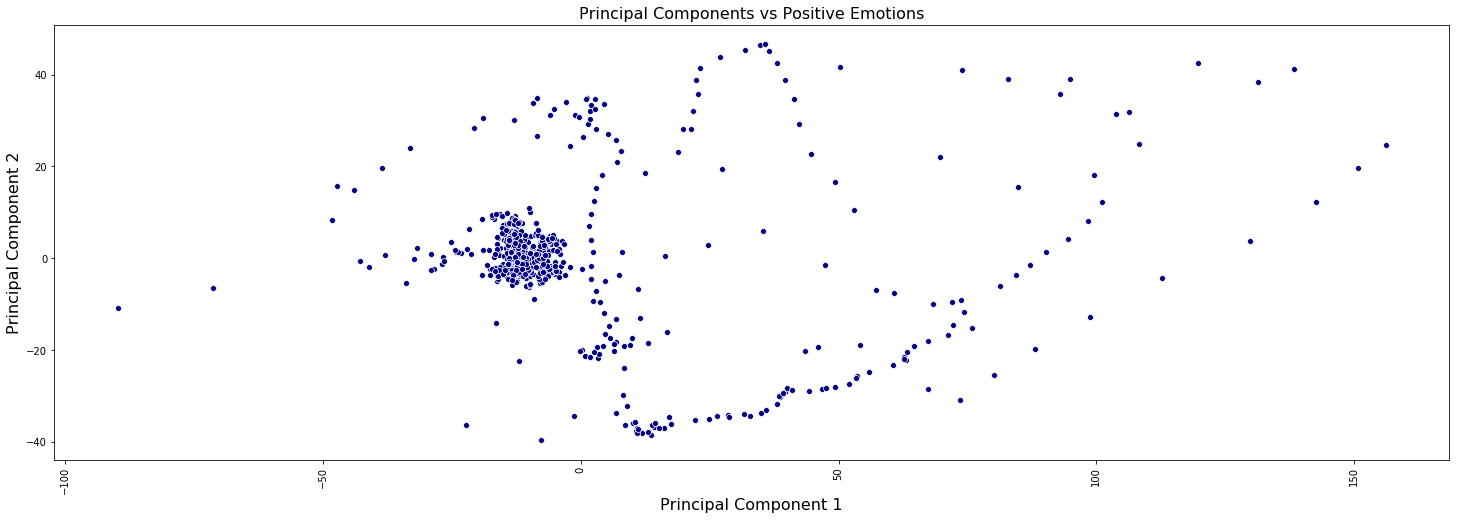

In [62]:
plt.figure(figsize=(25,8))
sns.scatterplot(x=pca_vectors[:, 0], y=pca_vectors[:, 1], color='navy')
plt.title('Principal Components vs Positive Emotions', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=16)
plt.xticks(rotation='vertical');

#### From movie : LALA LAND, SLOW LIFE, FUNNY DOGS - Positive EMotions

## BACK TO Alpha-Beta-Gamma...

In [64]:
df.keys()

Index(['Unnamed: 0', 'id', 'indra_time', 'browser_latency', 'reading_time',
       'attention_esense', 'meditation_esense', 'eeg_power', 'raw_values',
       'signal_quality', 'createdAt', 'updatedAt', 'label', 'delta', 'theta',
       'low_alpha', 'high_alpha', 'low_beta', 'high_beta', 'low_gamma',
       'mid_gamma'],
      dtype='object')

In [65]:
df['beta'] = (df['low_beta']+df['high_beta'])/2
df['gamma'] = (df['low_gamma']+df['mid_gamma'])/2

In [66]:
core_df = df[['id', 'reading_time', 'theta', 'low_alpha', 'high_alpha', 'beta', 'gamma']]
core_df.shape

(30013, 7)

In [67]:
core_df.head()

,id,reading_time,theta,low_alpha,high_alpha,beta,gamma
0,12,2015-05-09 16:13:40.954,111373.0,52404.0,28390.0,17982.5,3440.5
1,12,2015-05-09 16:13:41.964,89551.0,3896.0,21727.0,12698.5,2069.5
2,12,2015-05-09 16:13:42.950,640624.0,153087.0,69733.0,149195.5,59382.5
3,12,2015-05-09 16:13:43.935,138630.0,67891.0,26459.0,381837.5,103082.0
4,12,2015-05-09 16:13:44.936,197772.0,190654.0,266433.0,146067.5,82713.0


In [69]:
core_df.describe()

,id,theta,low_alpha,high_alpha,beta,gamma
count,30013.000000,3.001300e+04,3.001300e+04,3.001300e+04,3.001300e+04,3.001300e+04
mean,13.685570,1.223562e+05,3.720717e+04,3.136871e+04,2.697670e+04,1.349836e+04
std,8.479506,2.118452e+05,8.336777e+04,7.023649e+04,6.639309e+04,3.765752e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000,2.191000e+04,6.635000e+03,6.290000e+03,6.218000e+03,2.600500e+03
50%,13.000000,4.951500e+04,1.531900e+04,1.368300e+04,1.139200e+04,5.116000e+03
75%,20.000000,1.258710e+05,3.522600e+04,3.005000e+04,2.205400e+04,1.051150e+04
max,30.000000,3.315050e+06,2.295117e+06,2.076031e+06,1.856212e+06,1.335764e+06


In [73]:
indexed = core_df.set_index('id')

In [74]:
indexed.head()

,reading_time,theta,low_alpha,high_alpha,beta,gamma
id,,,,,,
12,2015-05-09 16:13:40.954,111373.0,52404.0,28390.0,17982.5,3440.5
12,2015-05-09 16:13:41.964,89551.0,3896.0,21727.0,12698.5,2069.5
12,2015-05-09 16:13:42.950,640624.0,153087.0,69733.0,149195.5,59382.5
12,2015-05-09 16:13:43.935,138630.0,67891.0,26459.0,381837.5,103082.0
12,2015-05-09 16:13:44.936,197772.0,190654.0,266433.0,146067.5,82713.0


In [70]:
from sklearn import preprocessing

In [71]:
scaler = preprocessing.MinMaxScaler()

In [82]:
s_theta = scaler.fit_transform(np.array(indexed['theta']).reshape(-1,1))
# indexed['s_theta'] = scaled_df[0]

In [150]:
s_theta = s_theta/5

In [151]:
indexed['s_theta'] = s_theta

In [127]:
s_gamma = scaler.fit_transform(np.array(indexed['gamma']).reshape(-1,1))
s_low_alpha = scaler.fit_transform(np.array(indexed['low_alpha']).reshape(-1,1))
s_high_alpha = scaler.fit_transform(np.array(indexed['high_alpha']).reshape(-1,1))
s_beta = scaler.fit_transform(np.array(indexed['beta']).reshape(-1,1))

s_low_alpha = s_low_alpha
s_high_alpha = s_high_alpha
s_beta = s_beta
s_gamma = s_gamma

In [152]:
indexed['s_low_alpha'] = s_low_alpha/5
indexed['s_high_alpha'] = s_high_alpha/5
indexed['s_beta'] = s_beta/5
indexed['s_gamma'] = s_gamma/5

In [153]:
indexed.head()

,reading_time,theta,low_alpha,high_alpha,beta,gamma,s_theta,s_low_alpha,s_high_alpha,s_beta,s_gamma
id,,,,,,,,,,,
12,2015-05-09 16:13:40.954,111373.0,52404.0,28390.0,17982.5,3440.5,0.001344,0.004567,0.002735,0.001938,0.000515
12,2015-05-09 16:13:41.964,89551.0,3896.0,21727.0,12698.5,2069.5,0.001081,0.000340,0.002093,0.001368,0.000310
12,2015-05-09 16:13:42.950,640624.0,153087.0,69733.0,149195.5,59382.5,0.007730,0.013340,0.006718,0.016075,0.008891
12,2015-05-09 16:13:43.935,138630.0,67891.0,26459.0,381837.5,103082.0,0.001673,0.005916,0.002549,0.041142,0.015434
12,2015-05-09 16:13:44.936,197772.0,190654.0,266433.0,146067.5,82713.0,0.002386,0.016614,0.025668,0.015738,0.012384


In [154]:
renamed = core_indexed.rename(columns={"s_theta": "Theta", "s_low_alpha": "Low_alpha", "s_high_alpha":"High_alpha", "s_beta":"Beta", "s_gamma":"Gamma"})

In [155]:
renamed.head()

,Theta,Low_alpha,High_alpha,Beta,Gamma
id,,,,,
12,0.006719,0.022833,0.013675,0.009688,0.002576
12,0.005403,0.001698,0.010466,0.006841,0.001549
12,0.038649,0.066701,0.033590,0.080376,0.044456
12,0.008364,0.029581,0.012745,0.205708,0.077171
12,0.011932,0.083069,0.128338,0.078691,0.061922


In [156]:
bars.head()

,Theta,Low_alpha,High_alpha,Beta,Gamma
Gratitude,-0.05,0.1,0.08,-0.01,-0.15
Interest,0.16,0.03,-0.02,0.07,0.08
Love,-0.07,0.04,0.05,-0.01,-0.08
Arousal,0.08,-0.04,-0.17,0.08,0.1
Liking,0.03,0,-0.03,0.05,0


In [157]:
concat = pd.concat([renamed, bars])

In [158]:
concat.tail()

,Theta,Low_alpha,High_alpha,Beta,Gamma
Gratitude,-0.05,0.1,0.08,-0.01,-0.15
Interest,0.16,0.03,-0.02,0.07,0.08
Love,-0.07,0.04,0.05,-0.01,-0.08
Arousal,0.08,-0.04,-0.17,0.08,0.1
Liking,0.03,0,-0.03,0.05,0


In [159]:
concat.head()

,Theta,Low_alpha,High_alpha,Beta,Gamma
12,0.00671924,0.0228328,0.0136751,0.00968774,0.00257568
12,0.00540269,0.00169752,0.0104656,0.00684108,0.0015493
12,0.0386494,0.0667012,0.0335896,0.0803763,0.0444558
12,0.00836367,0.0295806,0.012745,0.205708,0.0771708
12,0.0119318,0.0830694,0.128338,0.0786912,0.0619219


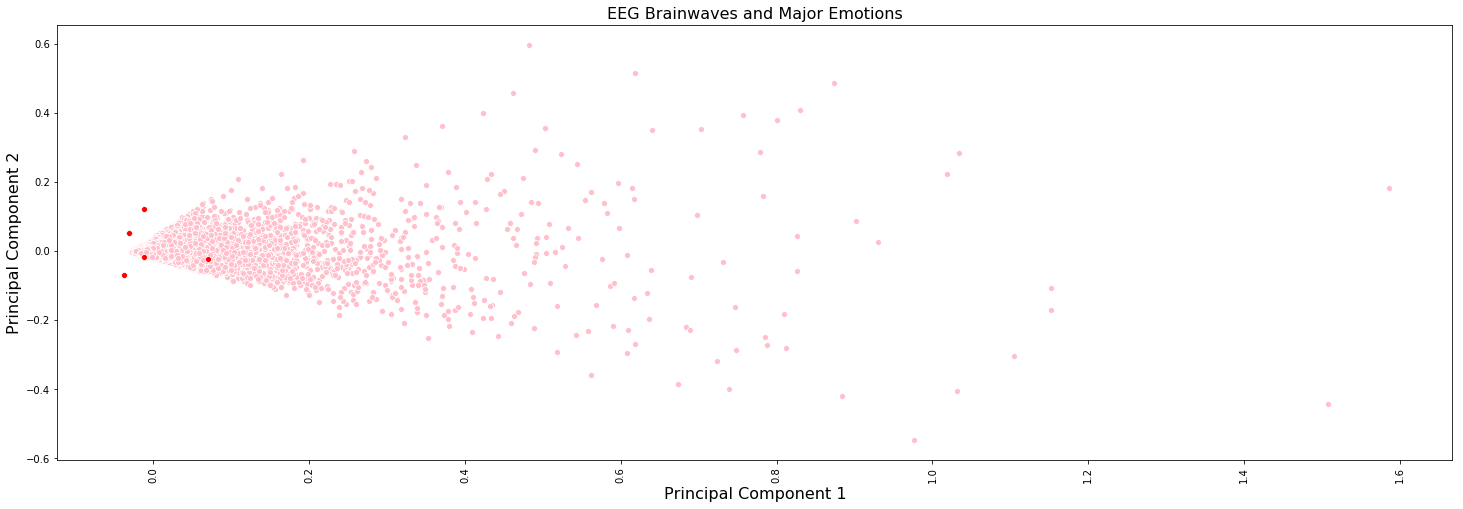

In [160]:
pca = PCA(n_components = 2)
pca_vectors = pca.fit_transform(concat)

plt.figure(figsize=(25,8))
sns.scatterplot(x=pca_vectors[:-5, 0], y=pca_vectors[:-5, 1], color='pink')
sns.scatterplot(x=pca_vectors[-5:, 0], y=pca_vectors[-5:, 1], color='red')
plt.title('EEG Brainwaves and Major Emotions', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=16)
plt.xticks(rotation='vertical');

In [118]:
gratitude = np.array([-0.05, 0.1, 0.08, -0.01, -0.15])
interest = np.array([0.16, 0.03, -0.02, 0.07, 0.08])
love = np.array([-0.07, 0.04, 0.05, -0.01, -0.08])
arousal = np.array([0.08, -0.04, -0.17, 0.08, 0.1])
liking = np.array([0.03, 0, -0.03, 0.05, 0])

emotion_data = np.array([gratitude, interest, love, arousal, liking])

#### Gratitude, Interest, Love, Arousal, Liking

columns=['Theta', 'Low_alpha', 'High_alpha', 'Beta', 'Gamma']
index=['Gratitude', 'Interest', 'Love', 'Arousal', 'Liking']
bars = pd.DataFrame(columns=['Gratitude', 'Interest', 'Love', 'Arousal', 'Liking'], index=['Theta', 'Low_alpha', 'High_alpha', 'Beta', 'Gamma'])

In [120]:
bars = bars.T
bars

,Theta,Low_alpha,High_alpha,Beta,Gamma
Gratitude,NaN,NaN,NaN,NaN,NaN
Interest,NaN,NaN,NaN,NaN,NaN
Love,NaN,NaN,NaN,NaN,NaN
Arousal,NaN,NaN,NaN,NaN,NaN
Liking,NaN,NaN,NaN,NaN,NaN


In [121]:
bars.loc['Gratitude'] = gratitude
bars.loc['Interest'] = interest
bars.loc['Love'] = love
bars.loc['Arousal'] = arousal
bars.loc['Liking'] = liking
bars

,Theta,Low_alpha,High_alpha,Beta,Gamma
Gratitude,-0.05,0.1,0.08,-0.01,-0.15
Interest,0.16,0.03,-0.02,0.07,0.08
Love,-0.07,0.04,0.05,-0.01,-0.08
Arousal,0.08,-0.04,-0.17,0.08,0.1
Liking,0.03,0,-0.03,0.05,0


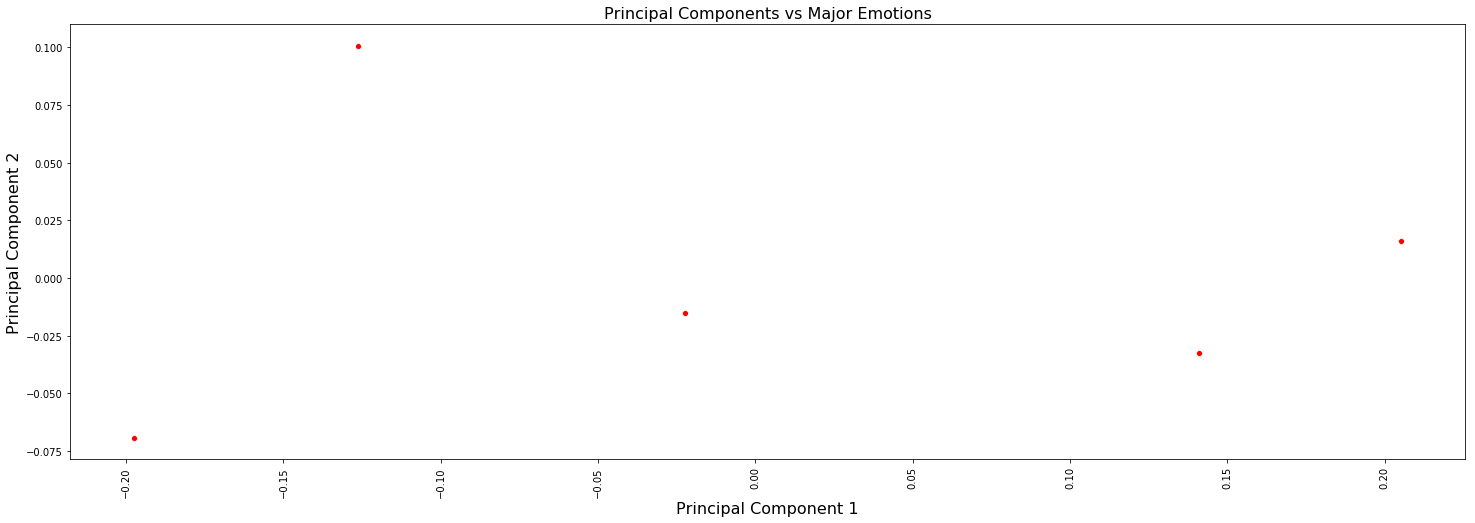

In [124]:
pca = PCA(n_components = 2)
pca_vectors = pca.fit_transform(bars)

plt.figure(figsize=(25,8))
sns.scatterplot(x=pca_vectors[:, 0], y=pca_vectors[:, 1], color='red')
plt.title('Principal Components vs Major Emotions', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=16)
plt.xticks(rotation='vertical');